<a href="https://colab.research.google.com/github/MarialuizaLeao/2021-1-exercicio-revisao-refatoracao/blob/main/05_SVM_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_original, y_original = make_blobs(n_features=2, n_samples=1000, random_state=42, centers=2)
X_original[y_original == 0][0]  = np.array([-0.1,6.5])
X_original[y_original == 1][0]  = np.array([2,5])

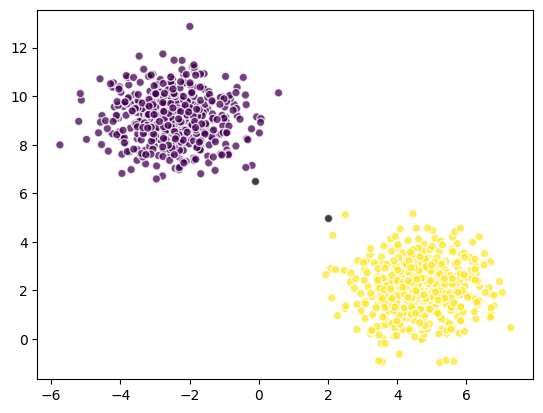

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_original[:,0], X_original[:,1], c=y_original, edgecolor='w', alpha=0.75)
ax.scatter(-0.1,6.5, c='k', edgecolor='w', alpha=0.75)
ax.scatter(2,5, c='k', edgecolor='w', alpha=0.75)

In [ ]:
import torch
torch.manual_seed(0)

In [ ]:
X = torch.hstack((torch.ones(1000).view(1000,1), torch.from_numpy(X_original)))
y = torch.from_numpy(y_original)
y[y==0] = -1

In [ ]:
def dist_point_line(w):
    dist_0 = abs(w[0][1].item()*(-0.1) + w[0][2].item()*(6.5) + w[0][0].item())/((w * w).sum().item())
    dist_1 = abs(w[0][1].item()*(2) + w[0][2].item()*(5) + w[0][0].item())/((w * w).sum().item())
    return dist_0, dist_1

In [ ]:
w = weights
w[0][1].item()*(-0.1) + w[0][2].item()*(6.5) + w[0][0].item()

0.055930236325903215

In [ ]:
weights

tensor([[ 0.4630,  0.2179, -0.0593]], dtype=torch.float64)

In [ ]:
weights[0][1].item()

0.21787038704888642

In [ ]:
def perceptron(X: torch.tensor, y: torch.tensor) -> torch.tensor:
    W = torch.rand((1,3), dtype = torch.float64)
    lr = 0.5
    change = True
    lambda_ = 0.01
    j = 0
    while (change):
        change = False
        for i in range(len(y)):
            yi = y[i]
            # previsao = W@X[i] + lambda_ * ((W * W).sum())
            previsao = torch.max(torch.tensor(0), (1.0 - yi * W@X[i])).mean() + lambda_ * ((W * W).sum())
            # previsao = W@X[i] 
            # previsao = 1 if previsao > 0 else 0 ## Essa será nossa função de ativação, a step function.
            if abs(previsao) >  abs(yi) or dist_point_line(W)[0] > 1.01*dist_point_line(W)[1] or dist_point_line(W)[0]*1.01  < dist_point_line(W)[1]  :
                W = W + 1e-5*lr*(yi-previsao)*X[i].view(1,3)
                change = True
        if j%100==0:
            print(W)

        j = j + 1

    return W


In [ ]:
weights = perceptron(X,y)

tensor([[0.9483, 0.5676, 0.7598]], dtype=torch.float64)


In [ ]:
def get_line(xi, w):
    return (-w[1] * xi - w[0]) / w[2]


In [ ]:
dist_point_line(weights)

(0.6380800234139189, 0.6444503160197356)

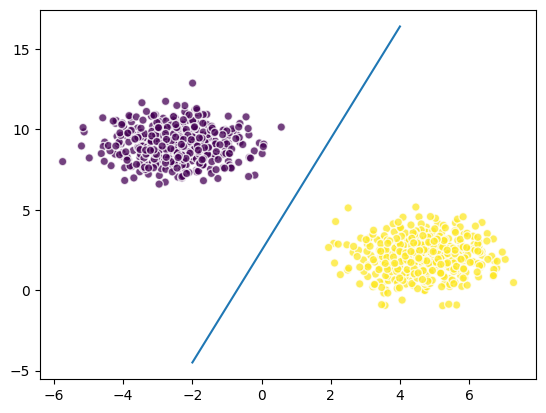

In [ ]:
x_plot = torch.linspace(-2, 4, 100)

fig, ax = plt.subplots()
ax.plot(x_plot,get_line(x_plot, weights[0]))
ax.scatter(X_original[:,0], X_original[:,1], c=y_original, edgecolor='w', alpha=0.75)

tensor([ 0.6843,  0.3216, -0.1072], dtype=torch.float64)